<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Lab8/Lab8part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/sagihaider/CE888_2020.git

fatal: destination path 'CE888_2020' already exists and is not an empty directory.


In [1]:
import os

os.environ['KAGGLE_USERNAME'] = "thiviyannanthakumar" # username from the json file

os.environ['KAGGLE_KEY'] = "db6a2de7496e7641f57e6c1b19007a51" # key from the json file

!kaggle competitions download -c dogs-vs-cats # api copied from kaggle



sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:


from zipfile import ZipFile
file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall() 
  print('done')


done


In [3]:
!mkdir train/cats
!mkdir train/dogs
!mv train/cat.*.jpg train/cats/
!mv train/dog.*.jpg train/dogs/



mkdir: cannot create directory ‘train/cats’: File exists
mkdir: cannot create directory ‘train/dogs’: File exists


In [4]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

In [5]:
import numpy as np
import os
import time
from CE888_2020.Lab_8.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

In [6]:
#%% Load an elephant image as an example and see the image-processing

img_path = '/content/CE888_2020/Lab_8/elephant.jpg' # image name
img = image.load_img(img_path, target_size=(224, 224)) # load image
x = image.img_to_array(img) # convert image to array
print (x.shape)
x = np.expand_dims(x, axis=0) # expand dimension
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [0]:
#%% Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/train'
data_dir_list = os.listdir(data_path)


In [0]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)

In [14]:
img_list

['cat.2866.jpg',
 'cat.2900.jpg',
 'cat.11719.jpg',
 'cat.10768.jpg',
 'cat.11373.jpg',
 'cat.2997.jpg',
 'cat.12347.jpg',
 'cat.692.jpg',
 'cat.4821.jpg',
 'cat.5609.jpg',
 'cat.9453.jpg',
 'cat.6529.jpg',
 'cat.88.jpg',
 'cat.2323.jpg',
 'cat.3094.jpg',
 'cat.4228.jpg',
 'cat.5220.jpg',
 'cat.9518.jpg',
 'cat.5324.jpg',
 'cat.1964.jpg',
 'cat.5068.jpg',
 'cat.2899.jpg',
 'cat.4226.jpg',
 'cat.3385.jpg',
 'cat.3633.jpg',
 'cat.8468.jpg',
 'cat.7027.jpg',
 'cat.2648.jpg',
 'cat.3900.jpg',
 'cat.8235.jpg',
 'cat.8475.jpg',
 'cat.1882.jpg',
 'cat.11126.jpg',
 'cat.281.jpg',
 'cat.5812.jpg',
 'cat.6520.jpg',
 'cat.3965.jpg',
 'cat.1270.jpg',
 'cat.12272.jpg',
 'cat.6490.jpg',
 'cat.3570.jpg',
 'cat.3402.jpg',
 'cat.2777.jpg',
 'cat.1159.jpg',
 'cat.11198.jpg',
 'cat.6700.jpg',
 'cat.12123.jpg',
 'cat.8651.jpg',
 'cat.9317.jpg',
 'cat.12201.jpg',
 'cat.809.jpg',
 'cat.68.jpg',
 'cat.6101.jpg',
 'cat.2002.jpg',
 'cat.9830.jpg',
 'cat.3033.jpg',
 'cat.3847.jpg',
 'cat.8796.jpg',
 'cat.4133.j

In [50]:
img_data_list=[] # created an empty list for images to be loaded

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    newimg_list=img_list[:1000]
    newimg_list.extend(img_list[12500:13500])
    for img in newimg_list:
	  #print('Loaded the images of dataset-'+'{}\n'.format(dataset))
	  #for img in img_list:
      img_path = data_path + '/'+ dataset + '/'+ img
      img = image.load_img(img_path, target_size=(224, 224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      img_data_list.append(x)
		  #img = image.load_img(img_path, target_size=(224, 224))
		  #x = image.img_to_array(img)
		  #x = np.expand_dims(x, axis=0)
		  #x = preprocess_input(x)
#		x = x/255
		# print('Input image shape:', x.shape)
		  #img_data_list.append(x)
    

#%% 
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(2000, 1, 224, 224, 3)
(1, 2000, 224, 224, 3)
(2000, 224, 224, 3)


In [51]:
# Define the number of classes
num_classes = 2
print(img_data.shape[0])
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1000]=0
labels[1000:]=1


names = ['cats','dogs']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

2000


In [52]:
image_input = Input(shape=(224, 224, 3)) # shape of a single image

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet') # load VGG-16 model with 'top = true'
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [53]:
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [54]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable
custom_vgg_model.summary()

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [55]:
t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1600 samples, validate on 400 samples
Epoch 1/2
1600/1600 [==============================] - 204s - loss: 0.1047 - acc: 0.9613 - val_loss: 0.0896 - val_acc: 0.9700
Epoch 2/2
1600/1600 [==============================] - 203s - loss: 0.0424 - acc: 0.9862 - val_loss: 0.0783 - val_acc: 0.9775
Training time: -408.6821985244751
400/400 [==============================] - 42s    
[INFO] loss=0.0783, accuracy: 97.7500%


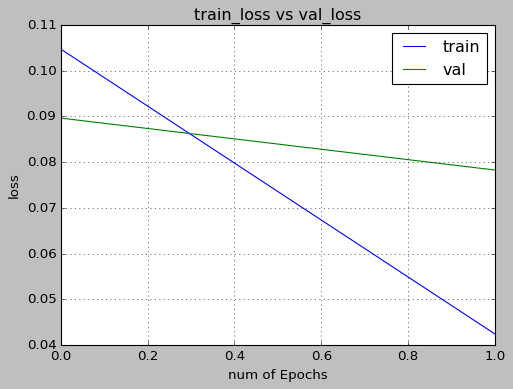

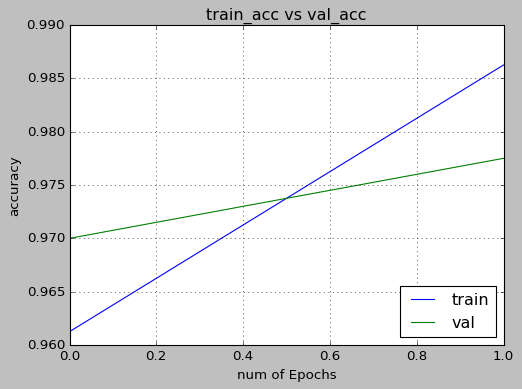

In [56]:
#%% plot
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(2)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])